# Data Science Intern @LGM Virtual Internship 2021

NAME - SAHEB SINGH SANDHU

TASK 2 (INTERMEDIATE LEVEL TASK)  Exploratory Data Analysis on Dataset - Terrorism :

AIM: To analyse and find out  the hot zone of terrorism from the perspective of a security/defense analyst using EDA.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Reading the Dataset 

In [2]:
data_set=pd.read_csv(r'C:\Users\Saheb Singh Sandhu\Downloads\terror.csv')

In [3]:
data_set.columns.to_list()   #Listing out the columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

## Renaming the columns

In [4]:
data_set.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data_set['Casualities'] = data_set.Killed + data_set.Wounded
data_set=data_set[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

In [5]:
data_set.columns    #Displays the newly renamed columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'latitude',
       'longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target_type', 'Weapon_type'],
      dtype='object')

In [6]:
data_set['Casualities'] = data_set.Killed + data_set.Wounded

In [7]:
data_set.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [8]:
data_set.tail()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,3.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,9.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,0.0,Unknown,Unknown,Unknown,Explosives


In [9]:
data_set.shape

(181691, 16)

In [10]:
data_set.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


In [12]:
data_set.describe(include='all')

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
count,181691.000000,181691.000000,181691.000000,181691,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,164817.000000,181055,181691,181691,181691
unique,NaN,NaN,NaN,205,12,36674,NaN,NaN,9,NaN,NaN,NaN,86006,3537,22,12
top,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,NaN,Civilians,Unknown,Private Citizens & Property,Explosives
freq,NaN,NaN,NaN,24636,50474,9775,NaN,NaN,88255,NaN,NaN,NaN,6461,82782,43511,92426
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,5.296128,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,42.069023,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,4.000000,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [13]:
#Printing Max values from the Dataset

print('Country with most attacks: ',data_set['Country'].value_counts().idxmax())
print('City with most attacks: ',data_set['City'].value_counts().index[1])
print("Region with the most attacks:",data_set['Region'].value_counts().idxmax())
print("Year with the most attacks:",data_set['Year'].value_counts().idxmax())
print("Month with the most attacks:",data_set['Month'].value_counts().idxmax())
print("Group with the most attacks:",data_set['Group'].value_counts().index[1])
print("Most Attack Types:",data_set['AttackType'].value_counts().idxmax())

Country with most attacks:  Iraq
City with most attacks:  Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


### Years and their Terror Counts

In [14]:
pd.DataFrame(data_set['Year'].value_counts(dropna=False).sort_index())

,Year
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526
1979,2662


In [15]:
most_terror = data_set['Country'].value_counts()

## Most Affected Countries

In [16]:
pd.DataFrame(most_terror.head(5))

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


## Most affected Cities 

In [17]:
pd.DataFrame(data_set['City'].value_counts()[:5])

,City
Unknown,9775
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265


# Data Visualisation

## BarPlot

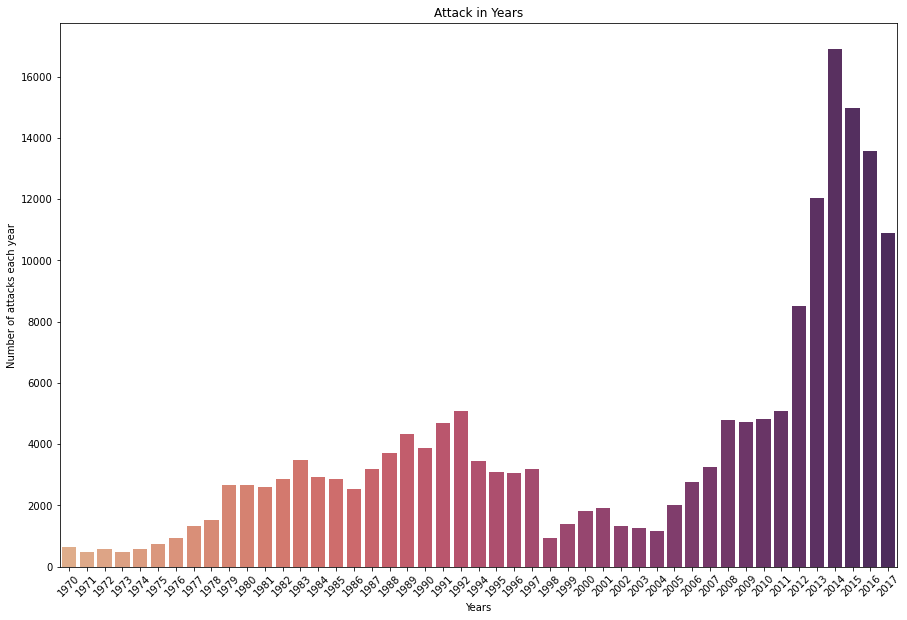

In [18]:
x_year = data_set['Year'].unique()
y_year = data_set['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
sns.barplot(x=x_year,y=y_year, palette= 'flare')
plt.xticks(rotation=45)
plt.title("Attack in Years")
plt.xlabel('Years')
plt.ylabel('Number of attacks each year')
plt.show()

## AreaPlot 

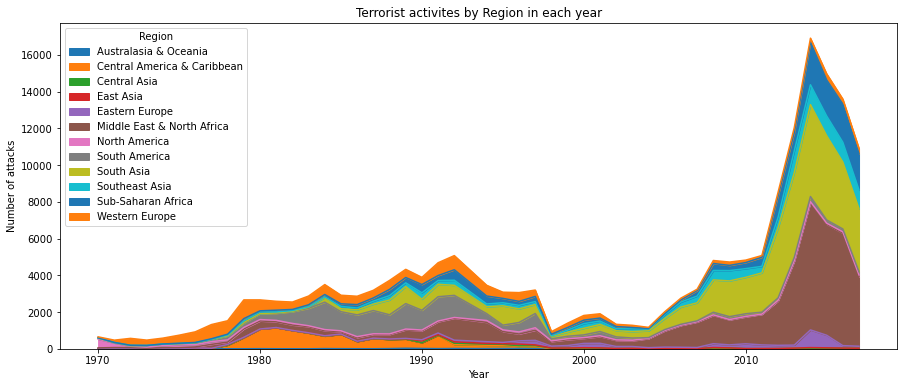

In [19]:
pd.crosstab(data_set.Year,data_set.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activites by Region in each year')
plt.ylabel("Number of attacks")
plt.show()

In [20]:
attack_country = data_set.Country.value_counts()[:15]
pd.DataFrame(attack_country)

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


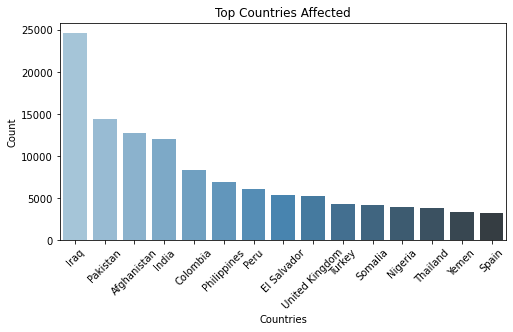

In [21]:
## Countries affected by terrorism
plt.subplots(figsize=(8,4))
sns.barplot(attack_country.index,attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

## CatPlot

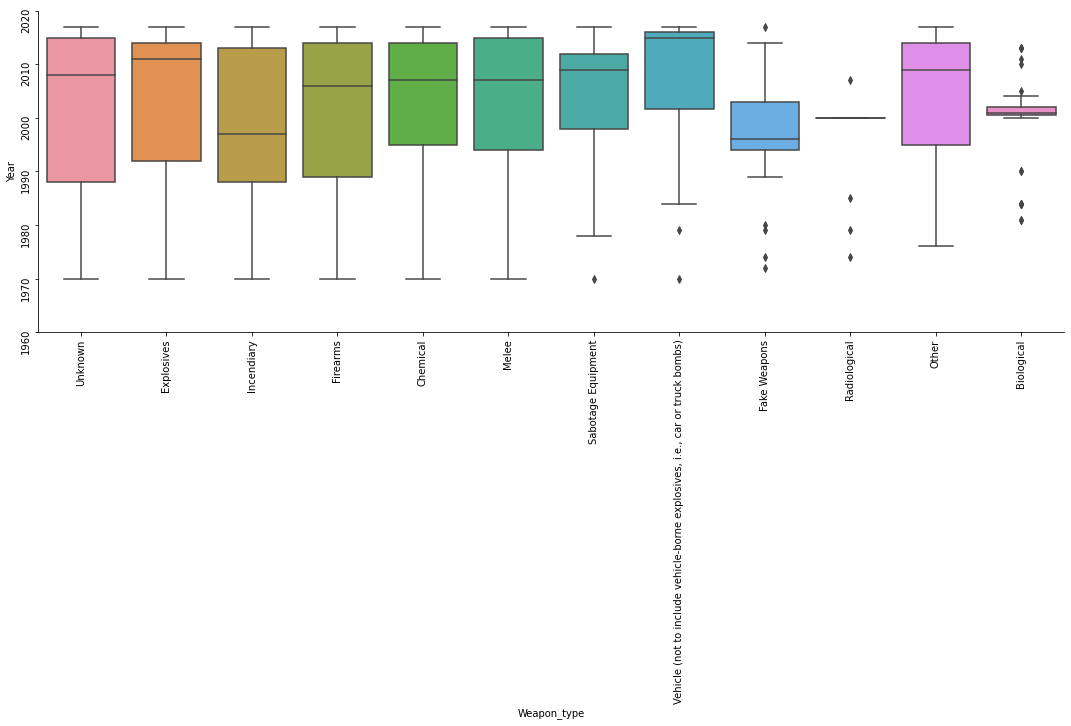

In [22]:
chart=sns.catplot(x='Weapon_type',y='Year',kind='box',height=5,aspect=3,data=data_set,orient="v")
chart.set_xticklabels(rotation=90)

chart.set_yticklabels(rotation=90)

# Conclusion from the above analysis

#### 1) Iraq is the country with most terrorist attacks.

#### 2) Baghdad is the city affected with most terror attacks.

#### 3) Taliban is the terrorist organization with most claimed terror attacks.

#### 4) India ranks 4th in the list of countries with most terrorist attacks.

#### 5) 2014 was the year with most terror attacks.(16903)

#### 6) Middle East and North Africa is the most affected region by terror attacks.

#### 7) Bombing/Explosion is the most used type of attacks.

#### 8) Explosives are the most used weapons.